In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from numpy import sqrt 
from sklearn.metrics import mean_squared_error as mse
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [3]:
dataPath = "cleanedCarFeatures.csv"

In [4]:
df = pd.read_csv(dataPath, low_memory = False)

In [5]:
df = df.loc[df['Year']>2015]
df['Year'].value_counts().sort_index(ascending=False)

2019.0    2431
2018.0    2801
2016.0    2225
Name: Year, dtype: int64

In [6]:
specs_to_dummies = []
        
for item in specs_to_dummies:
    dummies = pd.get_dummies(raw_data[item], prefix_sep=': ', prefix=item)
    raw_data = pd.concat([raw_data, dummies], sort=False, axis=1)

df = df.drop(specs_to_dummies, axis=1)

In [7]:
# DELETE ALL ROWS WHICH MISSING MSRP
df = df[pd.notnull(df['MSRP'])]
df[df['MSRP'].isnull()]

,Unnamed: 0,carName,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),...,Front Tire Width,Rear Wheel Size,Front Wheel Size,Tire Rating,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year,Cylinders,Net Torque RPM


In [8]:
df['Corrosion Miles/km'] = df['Corrosion Miles/km'].str.replace("Unlimited", "10000000")

#######################################################################
# REALLY SIMPLISTIC APPROACH TO RUN PREDICTIVE MODELS #################
#######################################################################

df = df.fillna(0)

In [9]:
#df['Min Ground Clearance (in)'] = df['Min Ground Clearance (in)'].astype(float)

del df['Engine Order Code'] 

del df['Trans Order Code'] 
del df['Turning Diameter - Curb to Curb'] 
del df['Front Tire Order Code'] 
del df['Rear Tire Order Code']
print(df[df['Corrosion Miles/km'].isnull()])
df['Corrosion Miles/km'] = pd.to_numeric(df['Corrosion Miles/km'], errors='coerce')
df = df.dropna(subset=['Corrosion Miles/km'])

Empty DataFrame
Columns: [Unnamed: 0, carName, MSRP, Style Name, Drivetrain, Passenger Capacity, Passenger Doors, Body Style, EPA Classification, Base Curb Weight (lbs), Front Hip Room (in), Front Leg Room (in), Second Shoulder Room (in), Passenger Volume, Second Head Room (in), Front Shoulder Room (in), Second Hip Room (in), Front Head Room (in), Second Leg Room (in), Wheelbase (in), Min Ground Clearance (in), Track Width, Front (in), Width, Max w/o mirrors (in), Track Width, Rear (in), Height, Overall (in), Cargo Volume to Seat 1, Cargo Volume to Seat 2, Fuel Tank Capacity, Approx (gal), Fuel Economy Est-Combined (MPG), EPA Fuel Economy Est - City (MPG), EPA Fuel Economy Est - Hwy (MPG), Fuel System, First Gear Ratio (:1), Sixth Gear Ratio (:1), Fourth Gear Ratio (:1), Second Gear Ratio (:1), Reverse Ratio (:1), Fifth Gear Ratio (:1), Trans Type, Third Gear Ratio (:1), Final Drive Axle Ratio (:1), Rear Brake Rotor Diam x Thickness (in), Front Brake Rotor Diam x Thickness (in), Steeri

In [10]:

#df['Corrosion Miles/km']= df['Corrosion Miles/km'].str.replace('50,000', '50000')
#df['Corrosion Miles/km']= df['Corrosion Miles/km'].str.replace('60,000', '60000')
#df['Corrosion Miles/km']= df['Corrosion Miles/km'].str.replace('100,000', '100000')
#df['Corrosion Miles/km'] = df['Corrosion Miles/km'].astype(int)
df['Maximum Alternator Capacity (amps)'] = df['Maximum Alternator Capacity (amps)'].astype(int)
df['Cold Cranking Amps @ 0° F (Primary)'] = df['Cold Cranking Amps @ 0° F (Primary)'].astype(int)
df['Wt Distributing Hitch - Max Tongue Wt. (lbs)'] = df['Wt Distributing Hitch - Max Tongue Wt. (lbs)'].astype(int)

In [11]:
df.head()


duplicate_columns = df.columns[df.columns.duplicated()]
duplicate_columns.to_list()

df = df.select_dtypes(exclude=['object'])

df.drop(duplicate_columns.to_list(), axis=1)
del df['Unnamed: 0'] 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('MSRP', axis=1), df['MSRP'], test_size=0.33, random_state=42)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 957620962.5452881, tolerance: 669111146.3481958
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1521006156.173584, tolerance: 669111146.3481958
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2466742640.213379, tolerance: 669111146.3481958
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

Text(0, 0.5, 'weights')

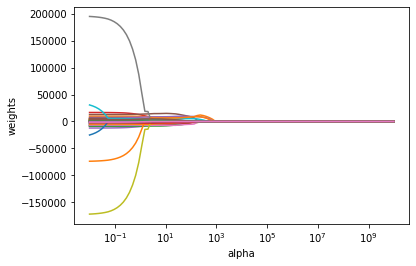

In [13]:
alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [14]:
pd.options.display.float_format = '{:.2f}'.format

In [15]:
lassocv = LassoCV(alphas = alphas , cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10006397486.178833, tolerance: 611519581.269667
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96269506415.86707, tolerance: 611519581.269667
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185581480379.37976, tolerance: 611519581.269667
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43884365411.591675, tolerance: 598253227.0822428
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137506490547.8711, tolerance: 598253227.0822428
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219428980046.96497, tolerance: 598253227.0822428
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You mi

18013.980617595913

# Get estimates
i = 4
#Left the real, right the predicted
y_test[i],lasso.predict(X_test)[i]

In [16]:

res = pd.Series(lasso.coef_, index=X_train.columns).to_frame("coeff")

print("POSITIVE impact Features")
print(res[(res.coeff!=0) & (res.coeff>0) ].count())
print(res[(res.coeff!=0) & (res.coeff>0)  ].sort_values('coeff', ascending=False))

POSITIVE impact Features
coeff    34
dtype: int64
                                            coeff
Wheel Size Ratio                        711045.42
Fourth Gear Ratio (:1)                   30747.27
Rear Tire Width                           7265.80
Displacement (L)                          4294.26
Rear Wheel Size                           3859.76
First Gear Ratio (:1)                     2327.65
Cylinders                                 1618.92
Passenger Doors                           1518.44
Fifth Gear Ratio (:1)                      472.43
Second Leg Room (in)                       435.06
Roadside Assistance Years                  426.96
Front Shoulder Room (in)                   404.83
Fuel Economy Est-Combined (MPG)            392.03
Second Head Room (in)                      318.75
Reverse Ratio (:1)                         316.21
Final Drive Axle Ratio (:1)                267.77
Width, Max w/o mirrors (in)                216.98
Passenger Capacity                         194.11


In [17]:
print("NEGATIVE impact Features")
print(res[(res.coeff!=0) & (res.coeff<0) ].count())
print(res[(res.coeff!=0) & (res.coeff<0)  ].sort_values('coeff', ascending=True))

NEGATIVE impact Features
coeff    22
dtype: int64
                                                   coeff
Tire Width Ratio                             -1585844.96
Basic Years                                    -12175.18
Third Gear Ratio (:1)                          -11948.27
Second Gear Ratio (:1)                         -11614.07
Front Tire Width                                -7281.47
Drivetrain Years                                -5213.16
Tire Ratio                                      -1947.66
Rear Brake Rotor Diam x Thickness (in)          -1067.02
Sixth Gear Ratio (:1)                            -981.23
Front Leg Room (in)                              -865.30
Corrosion Years                                  -653.36
Second Shoulder Room (in)                        -402.64
EPA Fuel Economy Est - Hwy (MPG)                 -291.56
Front Hip Room (in)                              -228.77
Year                                             -120.49
Passenger Volume                      

In [18]:
print("Penalised Features")
print(res[(res.coeff==0) ].count())
print(res[(res.coeff==0)])

Penalised Features
coeff    1
dtype: int64
                  coeff
Front Wheel Size  -0.00


In [19]:
xgbc = xgb.XGBRegressor()


pip install xgboost==1.3.3

In [20]:
model = xgbc.fit(X_train, y_train)



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

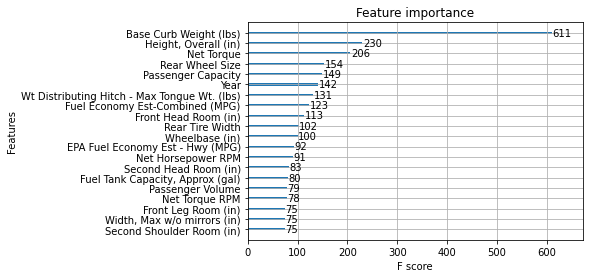

In [21]:
xgb.plot_importance(model, max_num_features=20)

In [22]:
Xcol = ['Base Curb Weight (lbs)','Height, Overall (in)','Net Torque','Rear Wheel Size','Passenger Capacity','Year','Wt Distributing Hitch - Max Tongue Wt. (lbs)','Fuel Economy Est-Combined (MPG)','Front Head Room (in)','Rear Tire Width','Wheelbase (in)','EPA Fuel Economy Est - Hwy (MPG)','Net Horsepower RPM','Second Head Room (in)','Fuel Tank Capacity, Approx (gal)','Passenger Volume','Net Torque RPM','Front Leg Room (in)','Width, Max w/o mirrors (in)','Second Shoulder Room (in)']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df[Xcol], df['MSRP'], test_size=0.33, random_state=42)

# Ridge Regression

In [39]:
model = Ridge(solver="sag", random_state=42, alpha=0.01)

In [40]:
model.fit(X_train, y_train)

Ridge(alpha=0.01, random_state=42, solver='sag')

In [41]:
ridge_preds_tr = model.predict(X_train)

ridge_preds_te = model.predict(X_test)

print('Train RMSLE:', sqrt(mse(y_train, ridge_preds_tr)))
print('Train mse:', mse(y_train, ridge_preds_tr))

Train RMSLE: 27229.44074728784
Train mse: 741442443.4100593


# SVM

In [42]:
model = SVR()

In [43]:
model.fit(X_train, y_train)

SVR()

In [44]:
SVM_preds_tr = model.predict(X_train)

SVM_preds_te = model.predict(X_test)

print('Train RMSLE:', sqrt(mse(y_train, SVM_preds_tr)))
print('Train mse:', mse(y_train, SVM_preds_tr))

Train RMSLE: 42931.0664644179
Train mse: 1843076467.772267


# RandomForest

In [59]:
model = RandomForestRegressor()

In [60]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
RFR_preds_tr = model.predict(X_train)

RFR_preds_te = model.predict(X_test)

print('Train RMSLE:', sqrt(mse(y_train, RFR_preds_tr)))
print('Train mse:', mse(y_train, RFR_preds_tr))

Train RMSLE: 3347.7968434905465
Train mse: 11207743.705285268


In [51]:
X_train.columns

Index(['Base Curb Weight (lbs)', 'Height, Overall (in)', 'Net Torque',
       'Rear Wheel Size', 'Passenger Capacity', 'Year',
       'Wt Distributing Hitch - Max Tongue Wt. (lbs)',
       'Fuel Economy Est-Combined (MPG)', 'Front Head Room (in)',
       'Rear Tire Width', 'Wheelbase (in)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'Net Horsepower RPM', 'Second Head Room (in)',
       'Fuel Tank Capacity, Approx (gal)', 'Passenger Volume',
       'Net Torque RPM', 'Front Leg Room (in)', 'Width, Max w/o mirrors (in)',
       'Second Shoulder Room (in)'],
      dtype='object')

In [50]:
X_train.describe()

,Base Curb Weight (lbs),"Height, Overall (in)",Net Torque,Rear Wheel Size,Passenger Capacity,Year,Wt Distributing Hitch - Max Tongue Wt. (lbs),Fuel Economy Est-Combined (MPG),Front Head Room (in),Rear Tire Width,Wheelbase (in),EPA Fuel Economy Est - Hwy (MPG),Net Horsepower RPM,Second Head Room (in),"Fuel Tank Capacity, Approx (gal)",Passenger Volume,Net Torque RPM,Front Leg Room (in),"Width, Max w/o mirrors (in)",Second Shoulder Room (in)
count,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00,3824.00
mean,2566.81,64.80,284.08,18.06,4.98,2017.71,261.58,19.92,37.73,243.31,116.81,23.09,5753.29,32.88,19.00,55.27,3407.19,40.23,74.48,48.94
std,1806.50,11.24,112.34,1.42,1.33,1.20,341.69,10.86,9.22,25.90,16.93,12.23,1020.87,13.45,5.99,53.64,1335.50,8.59,7.05,20.60
min,0.00,0.00,0.00,14.00,1.00,2016.00,0.00,0.00,0.00,175.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,57.20,200.00,17.00,5.00,2016.00,0.00,17.00,38.20,225.00,106.30,21.00,5500.00,36.80,15.30,0.00,2000.00,41.00,72.30,52.80
50%,3351.00,64.80,266.00,18.00,5.00,2018.00,100.00,22.00,39.50,245.00,111.70,26.00,6000.00,37.80,18.50,82.00,4000.00,41.80,74.40,55.50
75%,3934.00,70.90,339.00,19.00,5.00,2019.00,500.00,26.00,40.40,265.00,120.95,31.00,6400.00,39.00,22.50,100.10,4400.00,42.60,78.60,58.30
max,8591.00,110.10,935.00,22.00,15.00,2019.00,1330.00,109.00,63.60,355.00,178.00,66.00,8400.00,65.20,48.00,172.60,6500.00,46.40,86.30,71.40


In [57]:
data = [[3351.00,64.80,266.00,18.00,5.00,2018.00,100.00,22.00,39.50,245.00,111.70,26.00,6000.00,37.80,18.50,82.00,4000.00,41.80,74.40,55.50],
       [3934.00,70.90,339.00,19.00,5.00,2019.00,500.00,26.00,40.40,265.00,120.95,31.00,6400.00,39.00,22.50,100.10,4400.00,42.60,78.60,58.30]]

In [58]:
test_df = pd.DataFrame(data, columns = ['Base Curb Weight (lbs)', 'Height, Overall (in)', 'Net Torque',
       'Rear Wheel Size', 'Passenger Capacity', 'Year',
       'Wt Distributing Hitch - Max Tongue Wt. (lbs)',
       'Fuel Economy Est-Combined (MPG)', 'Front Head Room (in)',
       'Rear Tire Width', 'Wheelbase (in)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'Net Horsepower RPM', 'Second Head Room (in)',
       'Fuel Tank Capacity, Approx (gal)', 'Passenger Volume',
       'Net Torque RPM', 'Front Leg Room (in)', 'Width, Max w/o mirrors (in)',
       'Second Shoulder Room (in)'])

In [61]:
RFR_preds = model.predict(test_df)

In [62]:
RFR_preds

array([37761.09833333, 61716.33333333])